Energy Efficiency
LIBRERIAS QUE VAMOS A USAR EN EL PARCIAL5 

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

CARGAMOS EL DATASET 


In [121]:
data = pd.read_csv("ENB2012_dataLimpio.csv", delimiter=';')

In [123]:
# Mostrar las primeras filas
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


PREPROCESAMIENTO DE DATOS 

Vereficamos valores faltantes (En este dataset no hay, pero verificamos)

(Este dataset no tiene variables categóricas, pero si tuviera se usa LabelEncoder o OneHotEncoder)

In [132]:
data.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [134]:
# Mostrar estadísticas
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [136]:
# Revisar si hay columnas categóricas
data.select_dtypes(include='object')

""
0
1
2
3
4
...
763
764
765
766


DIVISION DE DATOS 

Separar variables de entrada (X) y variable objetivo (y), y dividir en entrenamiento y prueba.

In [140]:
X = data.iloc[:, 0:8]  # Primeras 8 columnas son las variables de entrada
y = data['Y1']         # Variable objetivo: Heating Load

In [142]:
# Dividir en train y test (75%-25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


MODELADO SVR: Lo cual es un modelo de regresión que usa principios de máquinas de soporte vectorial para predecir valores continuos, buscando minimizar los errores de predicción dentro de un margen tolerable, en este caso quedarian asi: 

Es obligatorio para SVR entrenar los datos

In [146]:
# Crear escaladores
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Ajustar y transformar
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

Definimos los parametros para buscar 

In [149]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2, 0.5]
}

Creamos el modelo y ejecutamos GridSearchCV

In [152]:
svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train_scaled)


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.01, 0.1, 0.2, 0.5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2')

RESULTADOS:

REPORTE DE HIPERPARAMETROS ENCONTRADOS:

In [155]:
#MEJORES HIPERPARAMETROS, Esto muestra la mejor combinación de kernel, C y epsilon.
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

Mejores parámetros encontrados:
{'C': 100, 'epsilon': 0.01, 'kernel': 'rbf'}


calcular y mostrar

Modelo con R2 score 

In [160]:
# Predecir con el mejor modelo
best_model = grid_search.best_estimator_
y_pred_scaled = best_model.predict(X_test_scaled)

# Invertir escalado para obtener valores originales
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1))

# Calcular R2
r2 = r2_score(y_test_original, y_pred)
print("R² Score:", r2)

R² Score: 0.9967156931111665


El R² Score indica qué tan bien se ajustan 
las predicciones del modelo a los valores reales. 
Entre más cercano a 1, mejor es el ajuste.

GRAFICO DE VALORES REALES VS PREDICHOS

Grafico de dispersion:

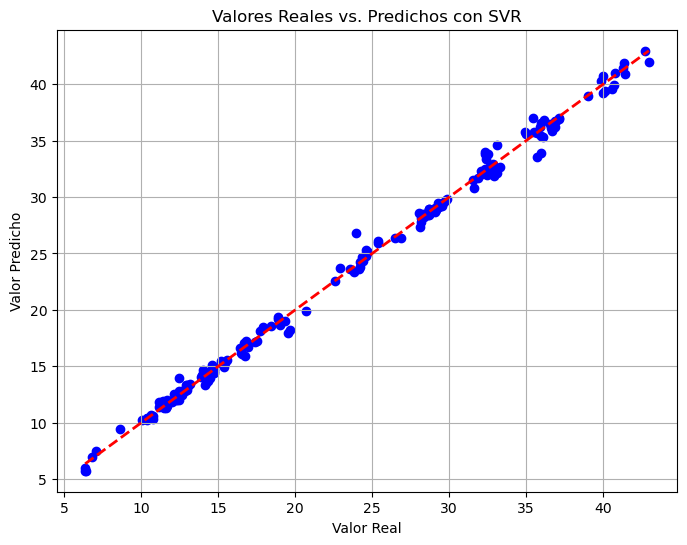

In [165]:

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Valores Reales vs. Predichos con SVR')
plt.grid(True)
plt.show()


SALIDA ESPERADA:
Un grafico de dispersion donde los puntos esten lo mas cerca posible de la linea roja diagonal
LINEA ROJA: Relacion ideal = (Valor real)
PUNTOS AZULES: Predicciones 

RESULTADO: 
El gráfico de dispersión muestra que la mayoría de los valores predichos 
se aproximan a los valores reales, alineándose cerca de la línea ideal.
Esto indica que el modelo SVR tiene un buen desempeño y predice con precisión el Heating Load.

EN CONCLUSION: En el Parcial 5 aplicamos un modelo de regresión SVR para predecir las cargas térmicas (Heating Load y Cooling Load) en edificaciones. Los resultados mostraron que es posible estimar con precisión estos valores a partir de variables de diseño, lo que permite optimizar la eficiencia energética desde la etapa de construcción, mejorando el rendimiento térmico y reduciendo consumos innecesarios.